## CPSC 340 Lecture 15: accompanying demo

Idea: show that overfitting corresponds to large values of the weights

In [2]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy.linalg as npla
%matplotlib inline

### Generate some random data in 1-d

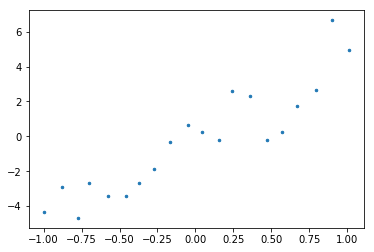

In [3]:
N = 20
X = np.linspace(-1,1,N)+npr.randn(N)*0.01
X=X[:,None]
y = npr.randn(N,1) + X*5

plt.plot(X,y,'.',markersize=5)

### Fit (interpolate) with degree $N-1$ polynomial

[ 14709008.5095221]


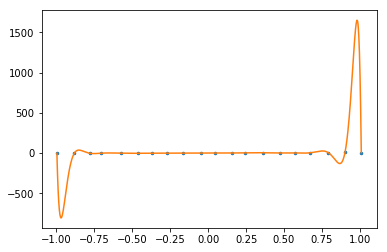

In [6]:
pf = PolynomialFeatures(N-1)
Z = pf.fit_transform(X)
w = npla.solve(Z.T @ Z, Z.T @ y)
grid = np.linspace(min(X),max(X),1000)[:,None]
grid_poly = pf.fit_transform(grid)

plt.plot(X,y,'.',markersize=5)
plt.plot(grid, grid_poly@w)
print(max(abs(w)))

Problem: this results are crazy (overfitting)

### Solution 1: lower degree polynomial

[ 4.52932341]


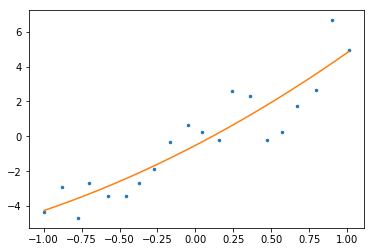

In [7]:
pf = PolynomialFeatures(2)
Z = pf.fit_transform(X)

w = npla.solve(Z.T @ Z, Z.T @ y)

plt.plot(X,y,'.',markersize=5)
grid_poly = pf.fit_transform(grid)
plt.plot(grid, grid_poly@w)
print(max(abs(w)))

Discussion:
- The lower degree polynomial looks good. 
- But if the true relationship really was complicated? Then if we restricted the degree of the polynomial, we'd miss out on it. 

### Solution 2: add L2-regularization

[ 2.8994517]


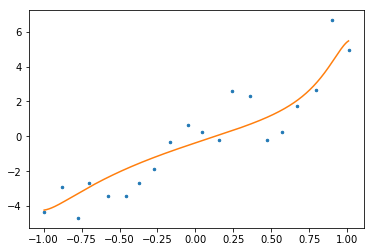

In [8]:
pf = PolynomialFeatures(N-1)
Z = pf.fit_transform(X)

reg_strength = 1
w = npla.solve(Z.T @ Z + reg_strength*np.eye(N), Z.T @ y)

plt.plot(X,y,'.',markersize=5)
grid_poly = pf.fit_transform(grid)
plt.plot(grid, grid_poly@w)
print(max(abs(w)))

Discussion:
- Regularization helped! Even though we used a degree $N-1$ polynomial, we didn't end up with a crazy model.
- We can add regularization to many models, not just least squares with a polynomial basis.